In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Prétraiter les données
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Construire le modèle
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

# Compiler le modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entraîner le modèle
historique = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

# Sauvegarder le modèle
model.save('mnist_model.keras')

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7698 - loss: 0.7447 - val_accuracy: 0.9790 - val_loss: 0.0804
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9626 - loss: 0.1243 - val_accuracy: 0.9857 - val_loss: 0.0560
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9721 - loss: 0.0885 - val_accuracy: 0.9868 - val_loss: 0.0484
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9784 - loss: 0.0697 - val_accuracy: 0.9882 - val_loss: 0.0435
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0669 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.9905 - val_loss: 0.0374
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0523 - val_accuracy: 0.9903 - val_loss: 0.0372
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


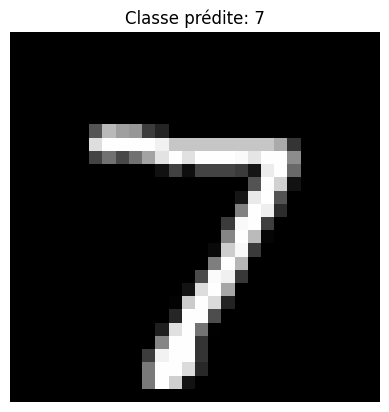

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner une image et la préparer pour la prédiction
indice_image = 0  # Changer pour tester avec différentes images
image = x_test[indice_image]
image_pour_predire = np.expand_dims(image, axis=0)  # Ajouter une dimension pour le batch

# Prédire la classe de l'image
predictions = model.predict(image_pour_predire)
classe_predite = np.argmax(predictions, axis=1)

# Afficher l'image et la prédiction
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Classe prédite: {classe_predite[0]}')
plt.axis('off')
plt.show()

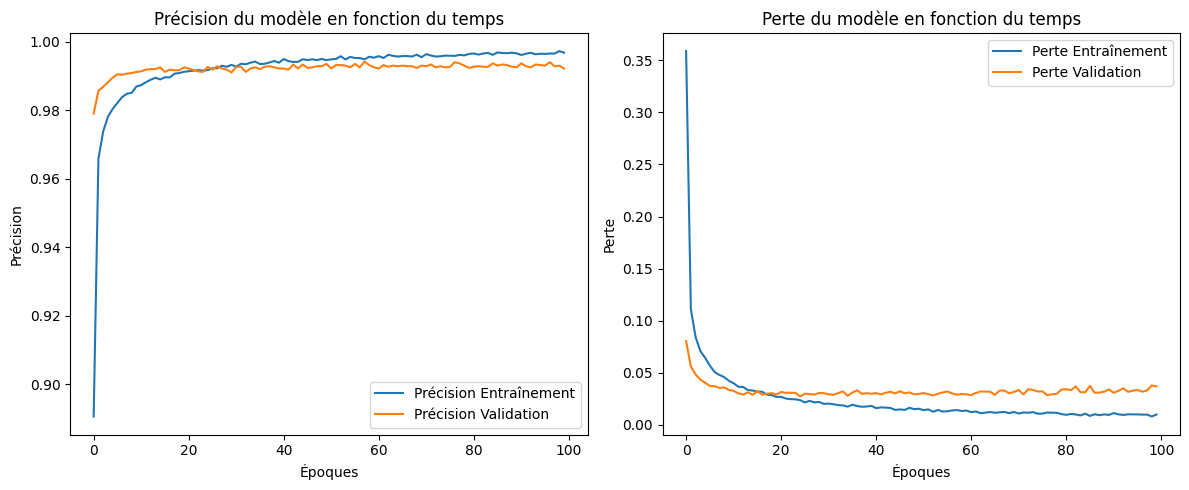

In [11]:
import matplotlib.pyplot as plt

# Tracer la précision d'entraînement et de validation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(historique.history['accuracy'], label='Précision Entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision Validation')
plt.title('Précision du modèle en fonction du temps')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Tracer la perte d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(historique.history['loss'], label='Perte Entraînement')
plt.plot(historique.history['val_loss'], label='Perte Validation')
plt.title('Perte du modèle en fonction du temps')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()
